In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from data_analysis import run_tsne, plot_tsne

In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [4]:
data_source = 'C:/Users/BiSBII/Documents/MM_ML/data/'

In [5]:
dataset_file = os.path.join(data_source, 'GREAT_TPM_GSE98923.csv')
metadata_file = os.path.join(data_source, 'GSE98923_metadata.xlsx')

In [6]:
data = pd.read_csv(dataset_file, index_col=0)
metadata = pd.read_excel(metadata_file, index_col=0)

In [7]:
data_log = pd.DataFrame(np.log2(data.values + 1.1), index=data.index, columns=data.columns)

In [7]:
data_log.to_csv(os.path.join(data_source, 'GREAT_LOG_TPM_GSE98923.csv'))

In [10]:
data_model_file = 'C:/Users/BiSBII/Documents/plantdb/omics_data/RNAseq/UPDATE/GREAT_TPM_GSE98923_MODEL_GENES.csv'

In [11]:
data_model = pd.read_csv(data_model_file, index_col=0)

In [12]:
our_data_model = data_log.loc[data_model.index, :]
our_data_model.to_csv(os.path.join(data_source, 'GREAT_LOG_TPM_GSE98923_MODEL_GENES.csv'))

# DATA ANALYSIS WILL ALL GENES

In [14]:
data_log.shape

(35336, 218)

In [16]:
data_log = data_log.transpose()
data_log.shape

(218, 35336)

In [18]:
y_state = metadata['state'][data_log.index]
y_state

KeyError: "None of [Index(['Vitvi00g00444', 'Vitvi00g00447', 'Vitvi00g00449', 'Vitvi00g00544',\n       'Vitvi00g00545', 'Vitvi00g00610', 'Vitvi00g00614', 'Vitvi00g00615',\n       'Vitvi00g00671', 'Vitvi00g00675',\n       ...\n       'Vitvi19g04642', 'Vitvi19g04643', 'Vitvi19g04644', 'Vitvi19g04645',\n       'Vitvi19g04649', 'Vitvi19g04650', 'Vitvi19g04651', 'Vitvi19g04654',\n       'Vitvi19g04659', 'VVRGA2'],\n      dtype='object', length=35336)] are in the [index]"

state
mature    128
green      90
Name: count, dtype: int64


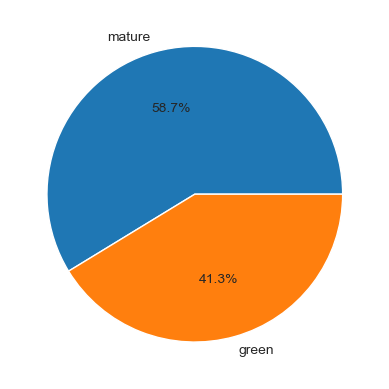

In [81]:
values = y_state.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
plt.savefig('pie_tissues.png')
plt.show()

year
2013    76
2014    75
2012    67
Name: count, dtype: int64


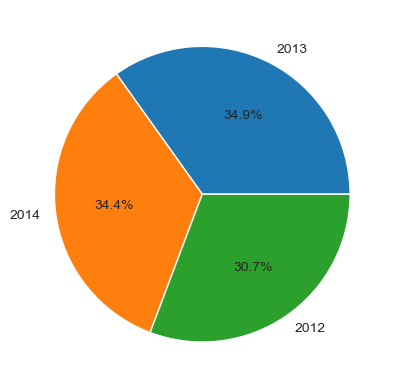

In [82]:
values = metadata['year'][data_log.index].value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
plt.savefig('pie_tissues.png')
plt.show()

In [83]:
y_cv = metadata['cultivar'][data_log.index]

cultivar
Cabernet Sauvignon    120
Pinot Noir             98
Name: count, dtype: int64


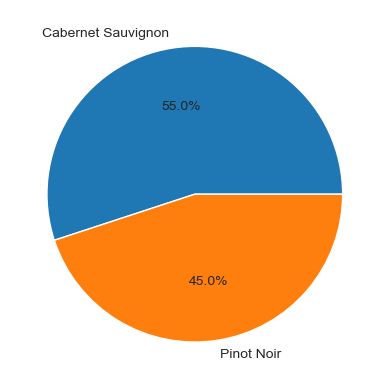

In [84]:
values = y_cv.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
plt.savefig('pie_tissues.png')
plt.show()

In [21]:
# remove some features
vt = VarianceThreshold(0.1)
data_filtered = vt.fit_transform(data_log)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=data_log.index, columns=data_log.columns[cols_inds])
df_data_filtered.shape

(218, 18254)

In [24]:
df_tsne = run_tsne(n_components=2, data=df_data_filtered)
df_tsne

,tsne 1,tsne 2
SRR5560506,10.375946,-0.575161
SRR5560507,10.330104,-0.349074
SRR5560509,9.366962,0.671649
SRR5560510,9.336253,0.736275
SRR5560511,9.353245,0.724215
...,...,...
SRR5560721,-7.079088,-16.571798
SRR5560722,-6.994942,-16.832035
SRR5560723,-6.535770,-15.759307
SRR5560724,-6.983154,-16.019245


In [85]:
df_tsne['factor'] = y_state

C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

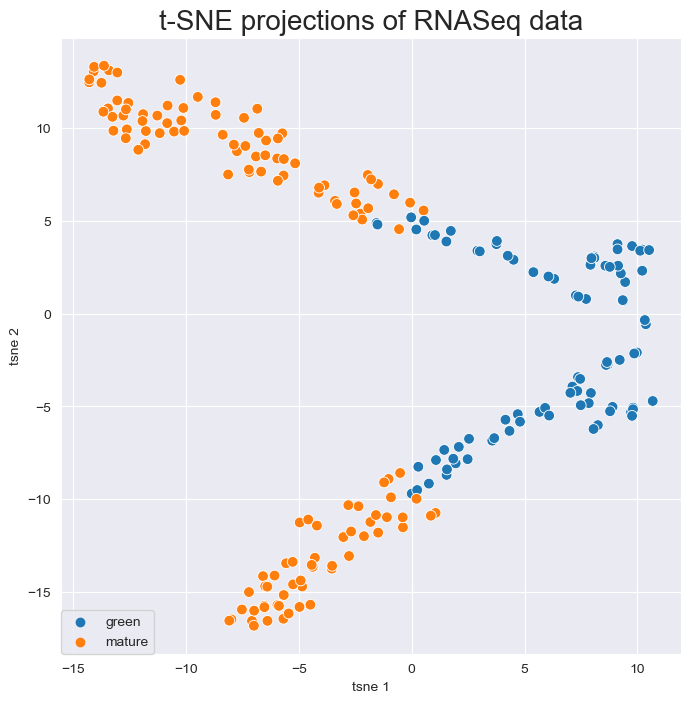

In [86]:
plot_tsne(data=df_tsne, name_fig='tsne_all_genes_state', title='t-SNE projections of RNASeq data')

In [87]:
df_tsne['factor'] = y_cv

C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

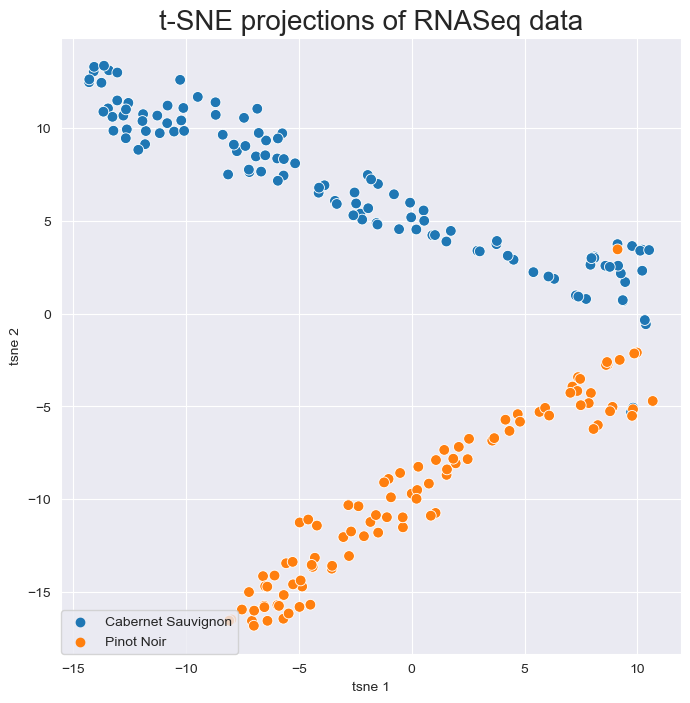

In [88]:
plot_tsne(data=df_tsne, name_fig='tsne_all_genes_cv', title='t-SNE projections of RNASeq data')

# Analyse data genes in model

In [13]:
our_data_model = our_data_model.transpose()

In [14]:
our_data_model.shape

(218, 6018)

In [15]:
# remove some features
vt = VarianceThreshold(0.1)
data_filtered_model = vt.fit_transform(our_data_model)
cols_inds = vt.get_support(indices=True)
df_data_filtered_model = pd.DataFrame(data_filtered_model, index=our_data_model.index, columns=our_data_model.columns[cols_inds])
df_data_filtered_model.shape

(218, 3501)

In [16]:
df_tsne_model = run_tsne(n_components=2, data=df_data_filtered_model)

In [17]:
df_tsne_model['factor'] = y_state

NameError: name 'y_state' is not defined

C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

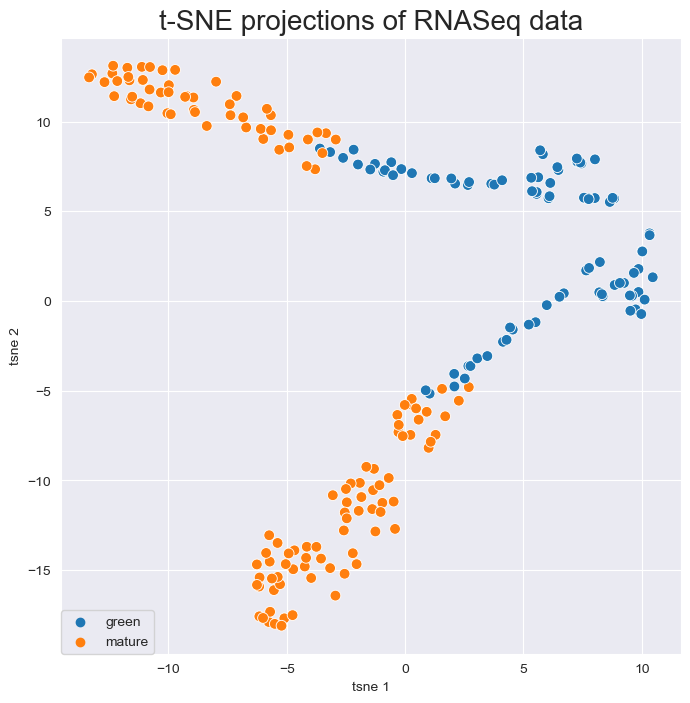

In [44]:
plot_tsne(data=df_tsne_model, name_fig='tsne_model_genes_state', title='t-SNE projections of RNASeq data')

In [45]:
df_tsne_model['factor'] = y_cv

C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BiSBII\anaconda3\envs\MM_ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

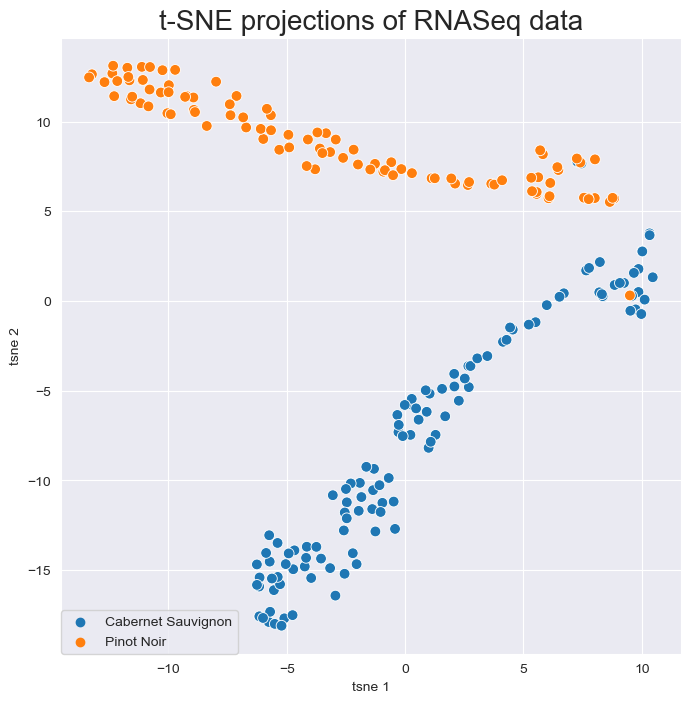

In [46]:
plot_tsne(data=df_tsne_model, name_fig='tsne_model_genes_cv', title='t-SNE projections of RNASeq data')

# APPLY ML TO PREDICT LABEL STATE

Usar dataset sem replicates

In [27]:
data_all_genes = pd.read_csv(os.path.join(data_source, 'GREAT_LOG_TPM_GSE98923_NOREPS.csv'), index_col=0)
data_all_genes = data_all_genes.transpose()
data_all_genes.shape

(73, 35336)

Metadata without replicates

In [21]:
metadata = pd.read_excel(metadata_file, index_col=0, sheet_name='NO_REPLICATES')
metadata

,cultivar,year,state
MEAN SAMPLES,,,
CS_time0_2012,Cabernet Sauvignon,2012,green
CS_time1_2012,Cabernet Sauvignon,2012,green
CS_time2_2012,Cabernet Sauvignon,2012,green
CS_time3_2012,Cabernet Sauvignon,2012,green
CS_time4_2012,Cabernet Sauvignon,2012,green
...,...,...,...
PN_time7_2014,Pinot Noir,2014,mature
PN_time8_2014,Pinot Noir,2014,mature
PN_time9_2014,Pinot Noir,2014,mature


In [22]:
y_state = metadata['state']

apply feature filter again

In [40]:
# remove some features
vt = VarianceThreshold(0.1)
data_filtered = vt.fit_transform(data_all_genes)
cols_inds = vt.get_support(indices=True)
df_data_filtered = pd.DataFrame(data_filtered, index=data_all_genes.index, columns=data_all_genes.columns[cols_inds])
df_data_filtered.shape

(73, 17008)

Numero de features muito elevado, vamos selecionar 10000

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

In [57]:
kb = SelectKBest(f_classif, k=1000)

filt_kb = kb.fit_transform(df_data_filtered, y_state)

cols_inds = kb.get_support(indices=True)

df_kb = pd.DataFrame(filt_kb, columns=df_data_filtered.columns[cols_inds], index=df_data_filtered.index)
df_kb

,Vitvi00g04042,Vitvi00g04452,Vitvi00g04509,Vitvi00g04874,Vitvi01g00052,Vitvi01g00054,Vitvi01g00064,Vitvi01g00081,Vitvi01g00132,Vitvi01g00146,...,Vitvi19g01981,Vitvi19g02002,Vitvi19g02038,Vitvi19g02040,Vitvi19g02068,Vitvi19g02084,Vitvi19g02085,Vitvi19g02102,Vitvi19g02208,Vitvi19g02324
CS_time0_2012,6.648823,3.461251,0.608801,3.812649,8.245966,8.062405,2.874880,4.439553,4.928767,4.725970,...,2.933865,5.034444,5.548047,7.211354,2.418840,4.280177,6.482349,2.550543,2.576489,5.996434
CS_time1_2012,6.547554,3.263871,0.818662,4.160618,8.393021,7.825186,2.709232,5.450324,4.816863,5.150557,...,3.251369,4.965926,3.596846,5.228301,2.896258,4.822685,6.375802,3.047910,2.581916,6.503717
CS_time2_2012,5.898750,3.246709,1.019844,4.148582,7.755905,7.510964,3.348906,5.512927,4.603265,4.852589,...,3.884457,5.902441,3.759033,6.489759,2.720906,5.154887,5.633161,2.815615,2.756281,5.144680
CS_time3_2012,5.606912,3.223461,0.725618,4.058657,7.294004,7.553619,3.169990,5.677299,4.462691,4.649113,...,3.573216,5.749275,6.212430,9.930421,2.408046,5.103990,5.429044,2.375377,2.911359,4.195692
CS_time4_2012,4.619628,2.833759,0.302489,2.429959,5.743241,5.824885,1.447926,4.156183,3.719732,3.814342,...,2.286529,3.142072,9.599361,12.501915,1.437228,3.536278,3.845817,1.067888,1.568105,1.619848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PN_time7_2014,4.569786,2.445286,0.137504,1.119606,1.935992,4.188591,0.821681,1.362084,3.637236,3.882135,...,0.917641,1.342379,12.027525,12.940999,0.945874,2.121397,1.450128,0.414573,1.167762,0.910884
PN_time8_2014,4.552120,2.335150,0.191222,0.803171,0.813447,3.724934,0.900045,0.667075,3.473175,3.782687,...,0.886947,0.754585,12.363081,13.371678,0.743005,1.725303,1.127904,0.304845,1.001556,0.455864
PN_time9_2014,4.466573,2.208828,0.171857,0.833435,0.945525,3.801075,1.268775,1.100404,3.534894,3.533038,...,1.246000,0.923314,12.971709,13.694837,0.862491,1.389708,0.997145,0.183338,0.600052,0.692534
PN_time10_2014,4.631252,2.236535,0.223789,0.601855,0.839781,3.711392,0.935069,0.527320,3.633279,3.565040,...,0.729678,0.460618,12.837892,13.842312,0.823271,1.152123,1.081004,0.227989,0.413932,0.510052


divide data train test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_kb, y_state, test_size=0.20, random_state=42)

scale the data to facilitate the learning process

In [59]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Apply a simple model

In [34]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
clf.score(X_test, y_test)

0.9333333333333333

In [38]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [65]:
print('Precision: %0.2f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

Precision: 0.95
Recall: 0.93
Accuracy: 0.93


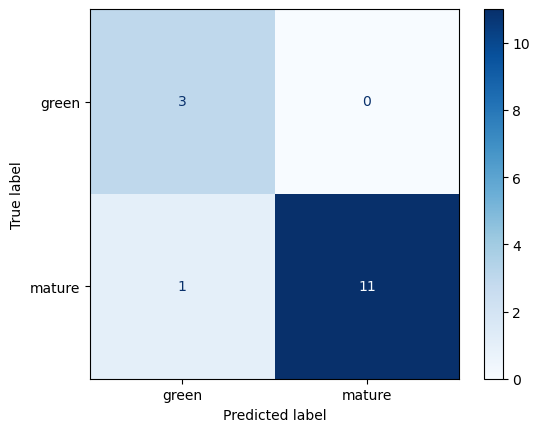

In [66]:
knn_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, cmap='Blues')
knn_cm

In [37]:
from sklearn import svm

In [68]:
svm_model = svm.SVC(kernel = "linear")
svm_model.fit(X_train, y_train)

svm_y_pred = svm_model.predict(X_test)

print('PECC (Accuracy): %0.2f' % svm_model.score(X_test, y_test))

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

PECC (Accuracy): 0.93
Precision: 0.95
Recall: 0.93
Accuracy: 0.93


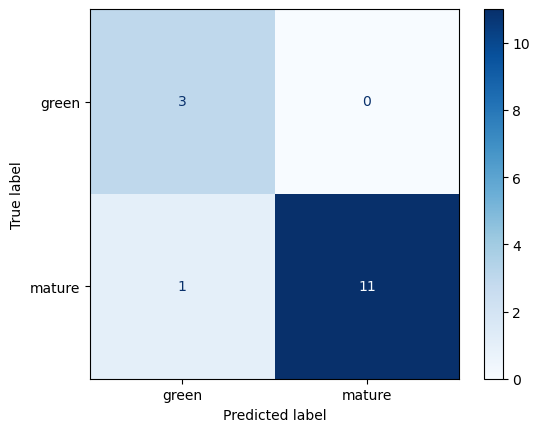

In [69]:
svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

## Usar só os genes do modelo

load dataset model genes no reps

In [19]:
data_model_genes = pd.read_csv(os.path.join(data_source, 'GREAT_LOG_TPM_GSE98923_MODEL_GENES_NOREPS.csv'), index_col=0)
data_model_genes = data_model_genes.transpose()
data_model_genes.shape

(73, 6018)

divide train test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data_model_genes, y_state, test_size=0.20, random_state=42)

In [24]:
X_train.shape

(58, 6018)

apply filter

In [48]:
# remove some features
vt = VarianceThreshold(0.1)
filter_train = vt.fit(X_train)

train_filtered = filter_train.transform(X_train)
test_filtered = filter_train.transform(X_test)

cols_inds = vt.get_support(indices=True)

X_train_filtered = pd.DataFrame(train_filtered, index=X_train.index, columns=X_train.columns[cols_inds])
X_train_filtered.shape

(58, 3340)

In [49]:
X_test_filtered = pd.DataFrame(test_filtered, index=X_test.index, columns=X_test.columns[cols_inds])
X_test_filtered.shape

(15, 3340)

In [50]:
kb2 = SelectKBest(f_classif, k=500)

kb2_fit = kb2.fit(X_train_filtered, y_train)

train_filtered2 = kb2_fit.transform(X_train_filtered)
test_filtered2 = kb2_fit.transform(X_test_filtered)

cols_inds = kb2_fit.get_support(indices=True)

X_train_filtered2 = pd.DataFrame(train_filtered2, columns=X_train_filtered.columns[cols_inds], index=X_train_filtered.index)
X_train_filtered2.shape

(58, 500)

In [51]:
X_test_filtered2 = pd.DataFrame(test_filtered2, columns=X_test_filtered.columns[cols_inds], index=X_test_filtered.index)
X_test_filtered2.shape

(15, 500)

In [52]:
scaler_model = StandardScaler().fit(X_train_filtered2)
X_train_scaled = scaler_model.transform(X_train_filtered2)
X_test_scaled = scaler_model.transform(X_test_filtered2)

In [53]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_filtered2.columns, index=X_train_filtered2.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_filtered2.columns, index=X_test_filtered2.index)

In [31]:
X_train_scaled_df.shape

(58, 500)

In [32]:
X_test_scaled_df.shape

(15, 500)

In [38]:
X_train_scaled_df.to_csv(os.path.join(data_source, 'XTRAIN_RNASEQ_MODEL_500_GENES_NOREPS.csv'))

In [39]:
y_train.to_csv(os.path.join(data_source, 'yTRAIN_MODEL_500_GENES_NOREPS.csv'))

In [40]:
X_test_scaled_df.to_csv(os.path.join(data_source, 'XTEST_RNASEQ_MODEL_500_GENES_NOREPS.csv'))

In [41]:
y_test.to_csv(os.path.join(data_source, 'yTEST_MODEL_500_GENES_NOREPS.csv'))

In [54]:
clf = LogisticRegression(random_state=0).fit(X_train_scaled_df, y_train)
y_pred = clf.predict(X_test_scaled_df)

In [55]:
print('Precision: %0.2f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


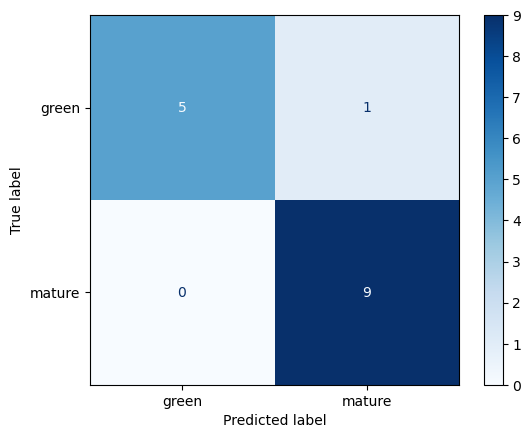

In [56]:
cm_lr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, cmap='Blues')

In [63]:
coefs = clf.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=X_train_scaled_df.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

,coef,mean_coef
Vitvi03g00413,0.192696,0.192696
Vitvi19g04471,-0.188291,0.188291
Vitvi06g01349,-0.150814,0.150814
Vitvi19g02164,-0.146164,0.146164
Vitvi06g01251,-0.140275,0.140275
...,...,...
Vitvi09g04497,-0.000570,0.000570
Vitvi18g02715,0.000540,0.000540
Vitvi10g00247,0.000475,0.000475
Vitvi06g01930,0.000354,0.000354


In [57]:
svm_model = svm.SVC(kernel = "linear")
svm_model.fit(X_train_scaled_df, y_train)

svm_y_pred = svm_model.predict(X_test_scaled_df)

print('PECC (Accuracy): %0.2f' % svm_model.score(X_test_scaled_df, y_test))

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

PECC (Accuracy): 0.93
Precision: 0.94
Recall: 0.93
Accuracy: 0.93


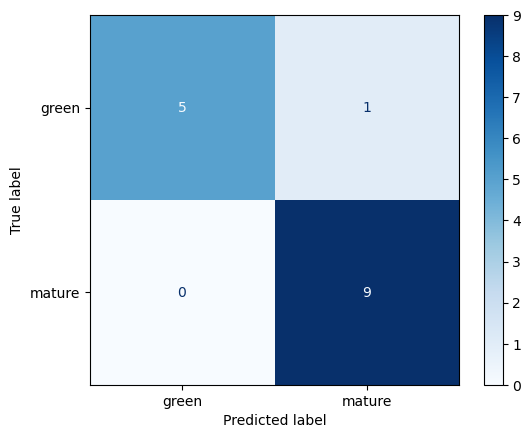

In [58]:
svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

In [62]:
coefs = svm_model.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=X_train_scaled_df.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

,coef,mean_coef
Vitvi03g00413,0.127568,0.127568
Vitvi19g04471,-0.099513,0.099513
Vitvi19g02164,-0.078852,0.078852
Vitvi06g01251,-0.076865,0.076865
Vitvi18g02476,0.074298,0.074298
...,...,...
Vitvi19g01479,0.000250,0.000250
Vitvi18g02739,-0.000228,0.000228
Vitvi02g01171,-0.000112,0.000112
Vitvi01g00662,-0.000071,0.000071


In [79]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [80]:
scores_svm_cv = cross_val_score(estimator=svm_model, X=data_filtered_model, y=y_state, cv = 5)
print('Accuracy values:', scores_svm_cv)
print('Mean accuracy: %0.2f' % scores_svm_cv.mean())

Accuracy values: [1.         1.         0.93333333 0.92857143 0.92857143]
Mean accuracy: 0.96


In [81]:
loo_cv = LeaveOneOut()
scores_loo = cross_val_score(estimator=svm_model, X=data_filtered_model, y=y_state, cv=loo_cv)

print('Mean accuracy: %0.2f' % scores_loo.mean())

Mean accuracy: 0.97


In [61]:
coefs = svm_model.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=data_filtered_model.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_model = RandomForestClassifier(n_estimators=100)

# scores_rf = cross_val_score(rf_model, df_data_scaled_model, y_state, cv=5)

# print('Accuracy values:', scores_rf)
# print('Mean accuracy: %0.2f' % scores_rf.mean())

rf_model.fit(X_train_scaled_df, y_train)

rf_y_pred = rf_model.predict(X_test_scaled_df)

print('PECC (Accuracy): %0.2f' % rf_model.score(X_test_scaled_df, y_test))

print('Precision: %0.2f' % precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, rf_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, rf_y_pred))

PECC (Accuracy): 1.00
Precision: 1.00
Recall: 1.00
Accuracy: 1.00


In [74]:
 importances = rf_model.feature_importances_
importances_df = pd.DataFrame(importances, columns=['importance'], index=X_train_scaled_df.columns)
importances_df.sort_values(by=['importance'], ascending=False)

,importance
Vitvi15g01181,0.02
Vitvi06g00723,0.02
Vitvi08g00209,0.02
Vitvi09g01302,0.02
Vitvi02g01227,0.02
...,...
Vitvi07g00293,0.00
Vitvi07g00289,0.00
Vitvi07g00207,0.00
Vitvi07g00047,0.00
